# EP1-MAC0209-Modelagem e Simulação
Instituto de matemática e estatística - USP ||
Professores: Roberto Marcondes Cesar Jr. - Roberto Hirata Jr.

Alunos:

Daniel Silva Lopes da costa N°USP: 11302720

João Seckler N°USP: 5603521

Marco Alves de Alcantara N°USP: 11221904

In [ ]:
import math
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


#Bloco em rampa

Na simulação, um objeto é deixado sobre uma rampa. Sobre ele atuam o atrito e a força da gravidade. Discretizamos o tempo com passo $dt = 0.1s$. Simulamos uma queda de 10 segundos. 

#### Solução analítica

$x_a(t) = S_0 + v_0t + at^2/2 $

$x_a(t) = g\sin(\theta)t^2$

#### Método de Euler

$v_s(t_{k+1}) = v_s(t_k) + g\sin(\theta)(t_{k+1} - t_k)$

$x_s(t_{k+1}) = x_s(t_k) + v_k(t_{k+1} - t_k)$


#### Método de Euler com atrito

$\frac{dv}{dt} = gsen(\theta) - a_{at}$

logo

$v_s(t_{k+1}) = v_s(t_k) + (g\sin(\theta) - a_{at})(t_{k+1} - t_k)$


Como dito acima, escolhemos $t_{k+1} - t_k$ constante e igual a $0.1$

In [ ]:
theta = math.radians(30) # inclinação do bloco
g = 10 # Aceleração da gravidade
aat = 2 # Aceleração do atrito

In [ ]:
analitica = [(-g) * math.sin(theta) * ((float(t)/10) ** 2)/2 for t in range(100)]
# analitica_at = [((-g) * math.sin(theta) + aat) * float(t)/10 ** 2 for t in range(100)]

euler = [0]
vk = 0
xk = 0
for i in range(1, 100):
  vk = vk + (-g)*math.sin(theta)*0.1
  xk = xk + vk*0.1
  euler.append(xk)

euler_at = [0]
vk = 0
xk = 0
for i in range(1, 100):
  vk = vk + ((-g)*math.sin(theta) + aat)*0.1
  xk = xk + vk*0.1
  euler_at.append(xk)

### Comparando a solução analítica com o método de Euler

A diferença chega a ser considerável, em torno dos 1%. O Segundo gráfico abaixo plota o a diferença entre as duas soluções no tempo. Como esperado, o erro cresce linearmente para uma função que cresce quadraticamente.

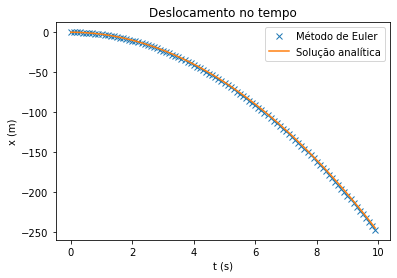

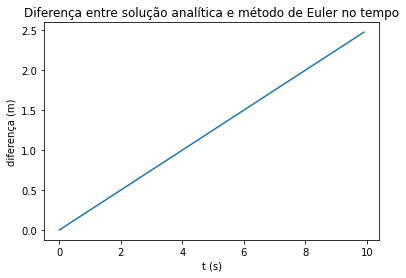


Média das diferenças: 1.2375000000000138


In [ ]:

t = [float(i)/10 for i in range(100)]
plt.figure(0)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.plot(t, euler, label='Método de Euler', linestyle='', marker='x')
plt.plot(t, analitica, label='Solução analítica')
plt.legend(loc="upper right")
plt.title("Deslocamento no tempo")
plt.show(block=False)

# Média das diferenças
dif = np.abs(np.array(euler) - np.array(analitica))

t = [float(i)/10 for i in range(100)]
plt.figure(0)
plt.xlabel("t (s)")
plt.ylabel("diferença (m)")
plt.plot(t, dif)
plt.title("Diferença entre solução analítica e método de Euler no tempo")
plt.show(block=False)
print("\nMédia das diferenças:", sum(dif)/len(dif))

### Comparando o método de Euler com e sem atrito

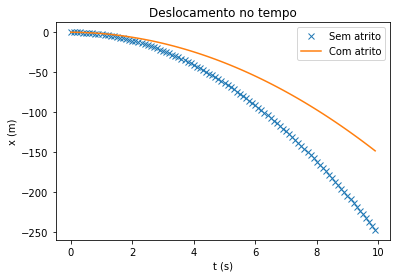


Média das diferenças: -33.32999999999997


In [ ]:
t = [float(i)/10 for i in range(100)]
plt.figure(0)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.plot(t, euler, label='Sem atrito', linestyle='', marker='x')
plt.plot(t, euler_at, label='Com atrito')
plt.legend(loc="upper right")
plt.title("Deslocamento no tempo")
plt.show(block=False)

em = (np.array(euler) - np.array(euler_at)).mean()
print("\nMédia das diferenças:", em)

###Simulação

In [ ]:
# Deslocamento horizontal e vertical
eulerx = np.array(euler) * (-math.cos(theta))
eulery = np.array(euler) * math.sin(theta)

fig, ax = plt.subplots()
plt.close()

ax.set_xlim((0, eulerx[-1]))
ax.set_ylim((eulery[-1], 0))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(eulerx[:i], eulery[:i])
    return (line,)
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim
  

# Lançamento de um projétil 
(solução analítica, Algoritmo de Euler e Algoritmo de Euler para o movimento com atrito)

Nessa simulação, um objeto de massa $m$ é lançado obliquamente com um ângulo $\theta$ em um terreno plano com velocidade inicial $V$. Ele está sujeito a uma aceleração constante $g$, causada pela força gravitacional.

No Algoritmo de Euler, o tempo foi discretizado com um passo $dt = 0.1s$.

No modelo com atrito, a força de atrito é dada por $F_{at} = kV^2$, a constante $k$ (chamada de coefAtrito no programa) vale $0.2$ por padrão.

A simulação continua até que o projétil caia de volta no chão.

In [ ]:
import math
import matplotlib.pyplot as plt

def nextxa(t,Vxi):
  return(Vxi*t) #movimento uniforme no eixo x

def nextya(t,Vyi,g):
  return(Vyi*t - 0.5*g*t*t) #movimento uniformemente variado

def nextvyEuler(g,vy,dt):
  return(vy-g*dt)

def nextxEuler(x,vx,dt):
  return(x+vx*dt)

def nextyEuler(y,vy,dt):
  return(y+vy*dt)

def nextvelEulerAtrito(coefAtrito,g,vx,vy,dt,massa):
  Vel = math.sqrt(vx*vx+vy*vy)
  Fat = coefAtrito*Vel*Vel
  anguloMov = math.atan2(vy,vx)
  Fatx = -Fat*math.cos(anguloMov)
  Faty = -Fat*math.sin(anguloMov)
  vx += dt*Fatx/massa
  vy -= dt*(g-Faty/massa)
  return(vx,vy)


theta = 45 #angulo de lancamento
theta = math.radians(theta)
V = 30 #velocidade de lancamento
Vxi = V * math.cos(theta)
Vyi = V * math.sin(theta)
g=10 #aceleracao da gravidade

vxEuler=Vxi #variaveis usadas pelo Algoritmo de Euler
vyEuler=Vyi
yEuler=0
xEuler=0

vxEulerA=Vxi #variaveis usadas pelo Algoritmo de Euler com atrito
vyEulerA=Vyi
yEulerA=0
xEulerA=0
coefAtrito=0.2
massa=4 #massa do projetil (kg)

dt = 0.1
t = 0
altura = 0

xa=[] #x analitico
ya=[] #y analitico
xe=[] #x Euler
ye=[] #y Euler
xea=[] #x Euler (com atrito)
yea=[] #y Euler (com atrito)

todosCairam=False
while(not todosCairam):
  todosCairam=True
  altura = nextya(t,Vyi,g)
  if(altura>=0):
    xa.append(nextxa(t,Vxi))
    ya.append(altura)
    todosCairam=False
  if(yEuler>=0):
    xe.append(xEuler)
    ye.append(yEuler)
    todosCairam=False
  if(yEulerA>=0):
    xea.append(xEulerA)
    yea.append(yEulerA)
    todosCairam=False
  print("Erro do y (t =", round(t,4),"): ",round(math.fabs(altura-yEuler),4));
  t+=dt
  xEuler = nextxEuler(xEuler,vxEuler,dt)
  yEuler = nextyEuler(yEuler,vyEuler,dt)
  vyEuler = nextvyEuler(g,vyEuler,dt)
  xEulerA = nextxEuler(xEulerA,vxEulerA,dt)
  yEulerA = nextyEuler(yEulerA,vyEulerA,dt)
  (vxEulerA,vyEulerA) = nextvelEulerAtrito(coefAtrito,g,vxEulerA,vyEulerA,dt,massa)



Erro do y (t = 0 ):  0.0
Erro do y (t = 0.1 ):  0.05
Erro do y (t = 0.2 ):  0.1
Erro do y (t = 0.3 ):  0.15
Erro do y (t = 0.4 ):  0.2
Erro do y (t = 0.5 ):  0.25
Erro do y (t = 0.6 ):  0.3
Erro do y (t = 0.7 ):  0.35
Erro do y (t = 0.8 ):  0.4
Erro do y (t = 0.9 ):  0.45
Erro do y (t = 1.0 ):  0.5
Erro do y (t = 1.1 ):  0.55
Erro do y (t = 1.2 ):  0.6
Erro do y (t = 1.3 ):  0.65
Erro do y (t = 1.4 ):  0.7
Erro do y (t = 1.5 ):  0.75
Erro do y (t = 1.6 ):  0.8
Erro do y (t = 1.7 ):  0.85
Erro do y (t = 1.8 ):  0.9
Erro do y (t = 1.9 ):  0.95
Erro do y (t = 2.0 ):  1.0
Erro do y (t = 2.1 ):  1.05
Erro do y (t = 2.2 ):  1.1
Erro do y (t = 2.3 ):  1.15
Erro do y (t = 2.4 ):  1.2
Erro do y (t = 2.5 ):  1.25
Erro do y (t = 2.6 ):  1.3
Erro do y (t = 2.7 ):  1.35
Erro do y (t = 2.8 ):  1.4
Erro do y (t = 2.9 ):  1.45
Erro do y (t = 3.0 ):  1.5
Erro do y (t = 3.1 ):  1.55
Erro do y (t = 3.2 ):  1.6
Erro do y (t = 3.3 ):  1.65
Erro do y (t = 3.4 ):  1.7
Erro do y (t = 3.5 ):  1.75
Erro do y (t

### Comparando a solução analítica com o método de Euler
Para o eixo X, como o movimento sem atrito é uniforme, a solução gerada pelo Algoritmo de Euler ficou muito próxima da solução analítica.

E como o movimento no eixo Y é uniformemente variado, o Algoritmo de Euler gerou uma solução diferente da analítica, com o erro absoluto aumentando linearmente com o tempo.

Além disso, ao diminuirmos o passo da discretização (dt), a solução de Euler converge para a solução analítica.

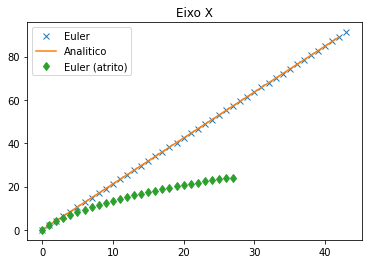

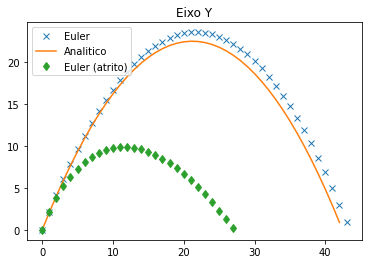

In [ ]:
plt.figure(0)
plt.plot(xe,label='Euler',linestyle='',marker='x')
plt.plot(xa,label='Analitico')
plt.plot(xea,label='Euler (atrito)',linestyle='',marker='d')
plt.legend(loc="upper left")
plt.title('Eixo X')
plt.show(block=False)

plt.figure(0)
plt.plot(ye,label='Euler',linestyle='',marker='x')
plt.plot(ya,label='Analitico')
plt.plot(yea,label='Euler (atrito)',linestyle='',marker='d')
plt.legend(loc="upper left")
plt.title('Eixo Y')
plt.show(block=False)

###Simulação

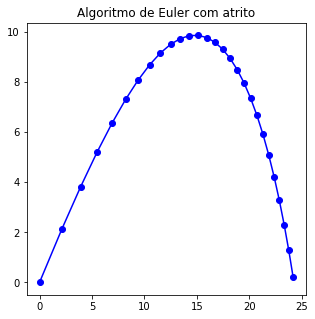

In [ ]:
def plotTrajeto(x,y, title):
    plt.close()
    figSimula, axSimula = plt.subplots(1, 1, figsize = (5, 5))

    axSimula.plot(x,y, 'b-o')
    plt.title(title)

    plt.show()
plotTrajeto(xea,yea,"Algoritmo de Euler com atrito")

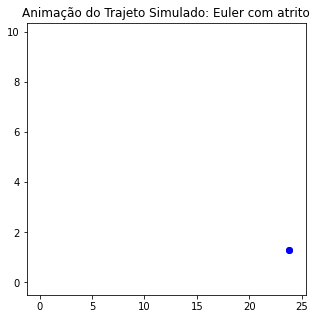

In [ ]:
from matplotlib import animation,rc
# initialization function: plot the background of each frame
def initAnimate():
    line.set_data([],[])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    ind0 = i%len(xAnim)
    ind1 = (i+1)%len(xAnim)
    ind1 = ind0
    #ax.plot(xs,ys,'r*')
    line.set_data([xAnim[ind0],xAnim[ind1]],[yAnim[ind0],yAnim[ind1]])
    return (line,)

def createAnimPlot(titleStr):
    plotSize=5

    figAnim, axAnim = plt.subplots(1, 1, figsize = (plotSize, plotSize))

    plt.title(titleStr)
    
    line, = axAnim.plot(xea, yea, 'b-o', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line)

# Animacao: Algoritmo de Euler com atrito

xAnim = xea
yAnim = yea

figAnim, axAnim, nFrames, line, = createAnimPlot('Animação do Trajeto Simulado: Euler com atrito')

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                             frames=nFrames, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

anim

# Movimento Circular

Na simulação temos um obejto em movimento circular uniforme.
Temo portanto $\frac{d\theta}{dt} = W$.
Na simulação assumimos que o raio de curvatura é de 1 metro, com velocidade angular de 10 rad/s e o intervalo de 0.01 segundos.

#### Solução analítica
$\theta(t)=wt+\theta_0$

$x(t)=raio \cdot cos(\theta)$

$y(t)=raio \cdot sin(\theta)$


#### Solução de Euler
$\theta(t_{k+1})=\theta(t_{k})+w\cdot (t_{k+1}-t_{k})$

$x(t)=raio \cdot cos(\theta)$

$y(t)=raio \cdot sin(\theta)$




In [ ]:
def nextOeuler(O,t,params,dt):
  return(O+params[1]*dt)

In [ ]:
def nextOanalítico(t,params):
  return params[1]*t+params[0]


In [ ]:
dt=0.01  #variação do tempo
t=0
w=10 #a velocidade angular é um condição de contorno, no caso consideramos 10rad/s 
O=0
raio=1 #Outra condição de contorno é o raio de curvatura, no caso vamos adimitir raio=1m.
params=[O,w] #condições de contorno: params[0] é angulo inicial; params[1] é a velocidade angular.

#Lista que aramazenarão as informações do caso analítico.
Oa=[]
Xa=[]
Ya=[]

#Lista que aramazenarão as informações do caso de Euler.
Oe=[]
Xe=[]
Ye=[]

tempo=[]
diferenca=[]
cont=0;
while(O<params[0]+6.3): #Foi escolhido um intervalo de 6.3, pois garante uma volta completa visto que 6.3>2pi
  Oa.append(nextOanalítico(t,params))
  oa=nextOanalítico(t,params)
  Ya.append(raio*(math.sin(nextOanalítico(t,params))))
  Xa.append(raio*math.cos(nextOanalítico(t,params)))

  Oe.append(nextOeuler(O,t,params,dt))
  Ye.append(raio*math.sin(nextOeuler(O,t,params,dt)))
  Xe.append(raio*math.cos(nextOeuler(O,t,params,dt)))

  tempo.append(t)
  t+=dt
  O=nextOeuler(O,t,params,dt)
  diferenca.append(nextOanalítico(t,params)-O)
  cont=cont+1


### Comparando a solução analítica com o método de Euler

Pela análise do segundo e do terceiro gráfico é possível perceber uma ligeira diferença entre o modelo analítico e o modelo de Euler. Tal difrença se evidencia pela análise do último gráfico onde temos a diferença crescente entre os angulos dos dois modelos, o que justifica a diferença nas posições de x e y.

No primerio gráfico temos uma aparente igualdade, o que se justifica pois não está sendo analizado o tempo. Por ser um movimento circular onde o raio não muda, as duas representações acabam por mostrar a mesma tragetória, só que não necessariamento no mesmo espaço de tempo, o que fica evidente, nas demais comparações.


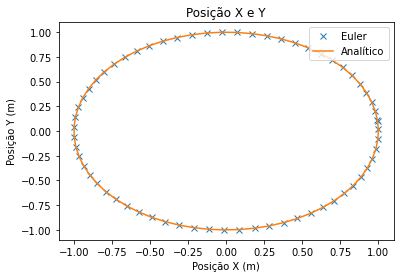

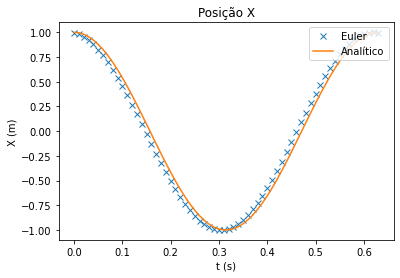

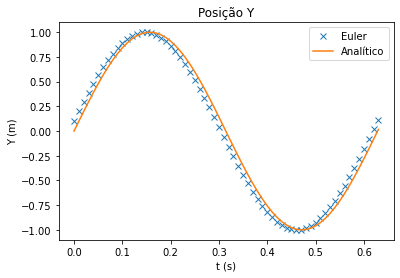

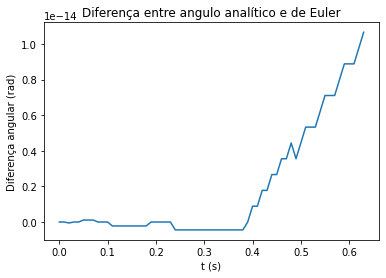

In [ ]:
plt.figure(0)
plt.plot(Xe,Ye,label='Euler',linestyle='',marker='x')
plt.plot(Xa,Ya,label='Analítico')
plt.xlabel("Posição X (m)")
plt.ylabel("Posição Y (m)")
plt.title('Posição X e Y')
plt.legend(loc="upper right")
plt.show(block=False)

plt.figure(0)
plt.plot(tempo,Xe,label='Euler',linestyle='',marker='x')
plt.plot(tempo,Xa,label='Analítico')
plt.xlabel("t (s)")
plt.ylabel("X (m)")
plt.title('Posição X')
plt.legend(loc="upper right")
plt.show(block=False)

plt.figure(0)
plt.plot(tempo,Ye,label='Euler',linestyle='',marker='x')
plt.plot(tempo,Ya,label='Analítico')
plt.xlabel("t (s)")
plt.ylabel("Y (m)")
plt.title('Posição Y')
plt.legend(loc="upper right")
plt.show(block=False)


plt.figure(0)
plt.plot(tempo,diferenca)
plt.xlabel("t (s)")
plt.ylabel("Diferença angular (rad)")
plt.title('Diferença entre angulo analítico e de Euler')
plt.show(block=False)

###Simulação

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import os
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
import random
import requests
import os
from io import BytesIO

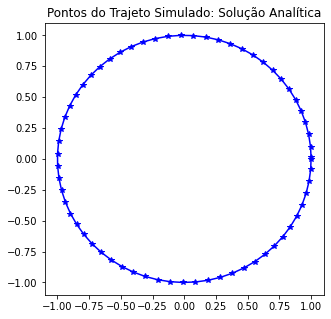

In [ ]:
simulaTrajeto(Xa,Ya,'Pontos do Trajeto Simulado: Solução Analítica')

In [ ]:
# initialization function: plot the background of each frame
def initAnimate():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    ind0 = i%len(xAnim)
    ind1 = (i+1)%len(xAnim)
    ind1 = ind0
    #ax.plot(xs,ys,'r*')
    line.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    return (line,)

def createAnimPlot(titleStr):
    plotSizeK=5

    figAnim, axAnim = plt.subplots(1, 1, figsize = (plotSizeK, plotSizeK))

    plt.title(titleStr)
    
    line, = axAnim.plot(Xa, Ya, 'b-o', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line)

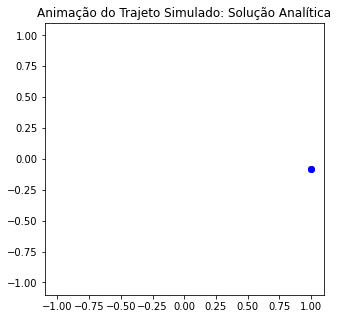

In [ ]:
# Animacao: Solucao analitica

xAnim = Xa
yAnim = Ya

figAnim, axAnim, nFrames, line, = createAnimPlot('Animação do Trajeto Simulado: Solução Analítica')

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                             frames=nFrames, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

anim
#plt.close()
